In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# first data
obesity = pd.read_csv("./Datasets/obesity.csv")
obesity["Age"] < 15

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Name: Age, Length: 2111, dtype: bool

In [3]:
# second data
obesity_lifestyle = pd.read_csv(r"./Datasets/Obesity and Lifestyle Data.csv")
obesity_lifestyle["Age"]
obesity_lifestyle.Age <= 18


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Age, Length: 1000, dtype: bool

In [4]:
# third data
obesity_data = pd.read_csv("./Datasets/obesity_data.csv")
obesity_data["Age"]


0      56
1      69
2      46
3      32
4      60
       ..
995    18
996    35
997    49
998    64
999    66
Name: Age, Length: 1000, dtype: int64

In [6]:
# 5th
obesity_sinthetic3 = pd.read_csv(r"./Datasets/ObesityDataSet_cleaned_and_data_sinthetic3.csv")
obesity_sinthetic3.Age <= 18

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Name: Age, Length: 2111, dtype: bool

In [7]:
# 7th
obesity_sinthetic = pd.read_csv("./Datasets/ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_sinthetic.Age <= 18

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Name: Age, Length: 2111, dtype: bool

In [5]:
# 4th 
obesity_level = pd.read_csv("./Datasets/obesity_level.csv")
obesity_level.Age <= 18

child_obesity_level_df = obesity_level[obesity_level['Age'] <= 18]
child_obesity_level_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
1,1,Female,18.0,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.0,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
8,8,Male,17.0,1.700000,70.000000,0,1,2.000000,3.000000,Sometimes,0,3.000000,1,1.000000,1.000000,0,Public_Transportation,Overweight_Level_I
12,12,Male,18.0,1.811189,108.251044,1,1,2.000000,2.164839,Sometimes,0,2.530157,0,1.000000,0.553311,0,Public_Transportation,Obesity_Type_I
17,17,Female,18.0,1.560000,50.000000,0,1,3.000000,3.000000,Sometimes,0,1.000000,0,1.000000,0.000000,Sometimes,Public_Transportation,0rmal_Weight


In [10]:
child_obesity = pd.read_csv("./Datasets/scraped one/child-adolescent-obesity.csv")
child_obesity.head()

,Entity,Code,Year,"Prevalence of overweight among children and adolescents, BMI > +1 standard deviations above the median (crude estimate) (%) - Sex: both sexes - Age group: 5-19 years of age"
0,Afghanistan,AFG,1990,3.10223
1,Afghanistan,AFG,1991,3.26977
2,Afghanistan,AFG,1992,3.45024
3,Afghanistan,AFG,1993,3.64325
4,Afghanistan,AFG,1994,3.85225


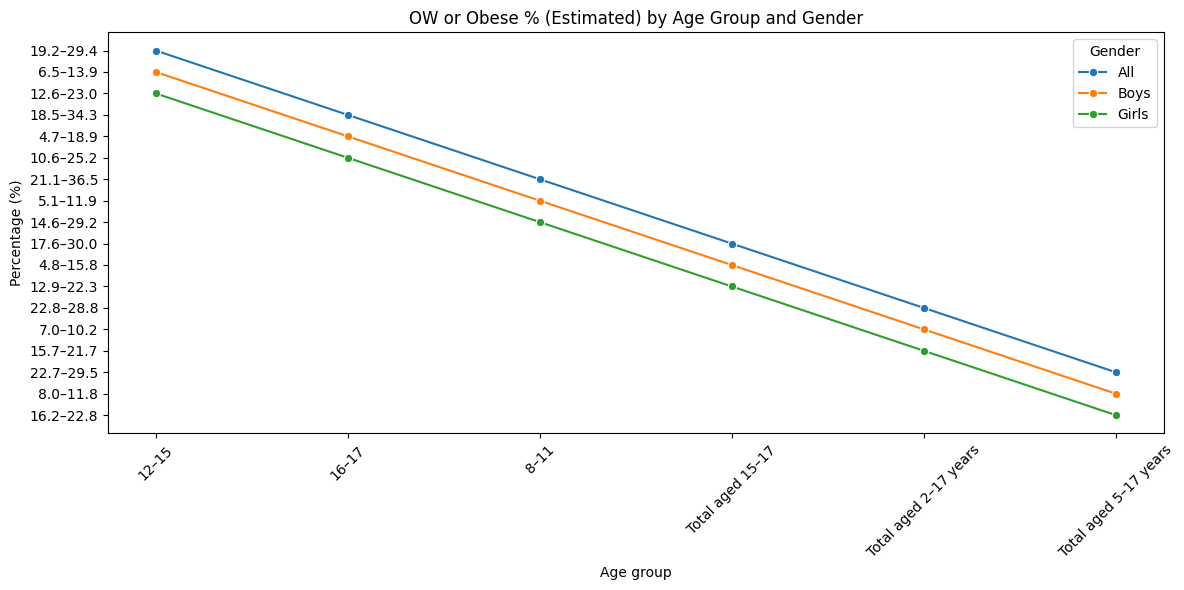

In [8]:
# 8th

# Step 1: Load the Excel sheet and skip the title row
raw = pd.read_excel(
    "./Datasets/scraped one/aihw-phe-251-overweight-obesity-data-tables-2024_2.xlsx",
    sheet_name="Table S10",
    skiprows=5  # skips title + headers
)

# Step 2: Manually slice out relevant columns
data = raw.iloc[:7, :25]  # adjust the slicing range if needed

# Step 3: Rename columns for clarity
data.columns = [
    "Age group",
    "Boys - OW%", "Boys - OW 95% CI",
    "Boys - Obese %", "Boys - Obese 95% CI",
    "Boys - OW or Obese %", "Boys - OW or Obese 95% CI",
    "Girls - OW%", "Girls - OW 95% CI",
    "Girls - Obese %", "Girls - Obese 95% CI",
    "Girls - OW or Obese %", "Girls - OW or Obese 95% CI",
    "All - OW%", "All - OW 95% CI",
    "All - Obese %", "All - Obese 95% CI",
    "All - OW or Obese %", "All - OW or Obese 95% CI",
    "Note1", "Note2", "Note3", "Note4", "Note5",
    "Note6"
]


# Step 4: Keep only useful columns
data = data[[
    "Age group",
    "Boys - OW%", "Boys - OW 95% CI", "Boys - Obese %", "Boys - Obese 95% CI", "Boys - OW or Obese %", "Boys - OW or Obese 95% CI",
    "Girls - OW%", "Girls - OW 95% CI", "Girls - Obese %", "Girls - Obese 95% CI", "Girls - OW or Obese %", "Girls - OW or Obese 95% CI",
    "All - OW%", "All - OW 95% CI", "All - Obese %", "All - Obese 95% CI", "All - OW or Obese %", "All - OW or Obese 95% CI"
]]

# Step 5: Melt the table into long format
melted = pd.melt(
    data,
    id_vars=["Age group"],
    var_name="Group + Metric",
    value_name="Value"
)

# Step 6: Split column into 'Gender', 'Category', 'Stat'
melted[['Gender', 'CategoryStat']] = melted['Group + Metric'].str.split(' - ', expand=True)
melted[['Category', 'Stat']] = melted['CategoryStat'].str.rsplit(' ', n=1, expand=True)
melted = melted.drop(columns=["Group + Metric", "CategoryStat"])

# Step 7: Pivot into tidy format
tidy = melted.pivot_table(
    index=["Age group", "Gender", "Category"],
    columns="Stat",
    values="Value",
    aggfunc="first"
).reset_index()

# Optional: Clean column names
tidy.columns.name = None
tidy = tidy.rename(columns={"%": "Percentage", "95% CI": "CI95"})

# Show result
tidy

# fix the CI column
def split_ci(ci):
    if isinstance(ci, str) and "-" in ci:
        parts = ci.split("-")
        try:
            return float(parts[0]), float(parts[1])
        except ValueError:
            return np.nan, np.nan
    else:
        return np.nan, np.nan

# apply to create CI_lower and CI_upper
tidy[["CI_lower", "CI_upper"]] = tidy["CI"].apply(lambda x: pd.Series(split_ci(x)))

# Estimate percentage as midpoint if missing
tidy["Percentage"] = tidy.apply(
    lambda row: (row["CI_lower"] + row["CI_upper"]) / 2 if pd.isna(row["Percentage"]) and pd.notna(row["CI_lower"]) and pd.notna(row["CI_upper"]) else row["Percentage"],
    axis=1
)

subset = tidy[tidy["Category"] == "OW or Obese"]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=subset,
    x="Age group",
    y="Percentage",
    hue="Gender",
    marker="o"
)

plt.title("OW or Obese % (Estimated) by Age Group and Gender")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [18]:
# 10th
children_sdgs = pd.read_csv("./Datasets/scraped one/children-who-are-overweight-sdgs.csv")
children_sdgs.rename(columns={"Overweight prevalence among children under 5 years of age (% weight-for-height >+2 SD), model-based estimates - Sex: both sexes": 
                              "Under-5 Overweight Prevalence (% WHZ > +2 SD, Both Sexes)"}, inplace=True)

children_sdgs

,Entity,Code,Year,"Under-5 Overweight Prevalence (% WHZ > +2 SD, Both Sexes)"
0,Afghanistan,AFG,2000,4.8
1,Afghanistan,AFG,2001,4.9
2,Afghanistan,AFG,2002,4.9
3,Afghanistan,AFG,2003,5.0
4,Afghanistan,AFG,2004,5.0
...,...,...,...,...
5295,Zimbabwe,ZWE,2020,3.1
5296,Zimbabwe,ZWE,2021,3.2
5297,Zimbabwe,ZWE,2022,3.4
5298,Zimbabwe,ZWE,2023,3.6


In [14]:
# S12 - Proportion of overweight or obese children and adolescents aged 2–17, by remoteness area, socioeconomic areas and sex, 2022
# Step 1: Load the Excel sheet and skip the title row
s12_raw = pd.read_csv("Datasets/scraped one/aihw-s12.csv")
# s12_raw.info()

# 1 - fix data types
for col in s12_raw.columns:
    if s12_raw[col].dtype == 'object':
        s12_raw[col] == pd.to_numeric(s12_raw[col], errors='coerce')
# print("\n")
# print(s12_raw.isnull().sum()) # check missing values

# 2 - normalize column names
s12_raw.columns = s12_raw.columns.str.lower().str.replace(" ", "_")

# 3 - encode categorical columns
s12_raw = pd.get_dummies(s12_raw, columns=['category', 'subcategory'], drop_first=True)

# 4 - calculate BMI - overweight + obese
s12_raw['boys_total_overweight_percent'] = (
    s12_raw['boys_overweight_not_obese_percent'] + s12_raw['boys_obese_percent'])

s12_raw['girls_total_overweight_percent'] = (
    s12_raw['girls_overweight_not_obese_percent'] + s12_raw['girls_obese_percent'])

s12_raw.head()

,boys_overweight_not_obese_percent,boys_overweight_not_obese_95ci,boys_obese_percent,boys_obese_95ci,boys_overweight_or_obese_percent,boys_overweight_or_obese_95ci,girls_overweight_not_obese_percent,girls_overweight_not_obese_95ci,girls_obese_percent,girls_obese_95ci,...,category_Socioeconomic areas,subcategory_Group 2,subcategory_Group 3,subcategory_Group 4,subcategory_Group 5 (least disadvantaged areas),subcategory_Inner regional areas,subcategory_Major cities,subcategory_Outer regional and remote areas,boys_total_overweight_percent,girls_total_overweight_percent
0,18.6,15.6-21.5,8.2,6.5-9.8,26.7,23.5-30.0,17.7,14.6-20.9,6.5,4.7-8.2,...,False,False,False,False,False,False,True,False,26.8,24.2
1,18.2,11.1-25.4,11.0,4.5-17.4,29.2,20.7-37.7,22.0,14.0-30.0,6.7,2.9-10.4,...,False,False,False,False,False,True,False,False,29.2,28.7
2,14.1,7.6-20.6,8.1,2.4-13.7,22.2,13.6-30.7,19.4,7.8-31.0,17.1,6.3-28.0,...,False,False,False,False,False,False,False,True,22.2,36.5
3,15.1,9.9-20.4,17.9,12.6-23.2,33.0,26.8-39.2,23.8,17.4-30.2,10.8,5.2-16.4,...,True,False,False,False,False,False,False,False,33.0,34.6
4,17.3,10.2-24.5,7.3,3.8-10.7,24.6,16.9-32.3,19.7,12.0-27.4,9.4,4.3-14.5,...,True,True,False,False,False,False,False,False,24.6,29.1


In [19]:
# S13 - Proportion of overweight or obese children and adolescents aged 2–17, by First Nations status, age group and sex, 2017–18 and 2018–19
# Step 1: Load the Excel sheet and skip the title row
s13_raw = pd.read_csv("Datasets/scraped one/aihw-s13.csv")

s13_raw = pd.get_dummies(s13_raw, columns=['Population_Group', 'Age_Group', 'Gender'], drop_first=True)

s13_raw.head()

,Overweight_not_obese_Percent,Overweight_not_obese_95CI,Obese_Percent,Obese_95CI,Overweight_or_obese_Percent,Overweight_or_obese_95CI,Population_Group_Non-Indigenous children 2017-18,Age_Group_15-17,Age_Group_2-4,Age_Group_5-9,Age_Group_Total aged 2-14 years,Age_Group_Total aged 2-17 years,Gender_Girls,Gender_Total
0,10.6,6.0-15.2,10.1,6.0-14.2,20.7,14.6-26.8,False,False,True,False,False,False,False,False
1,19.4,13.2-25.6,13.8,8.6-18.9,33.2,26.0-40.4,False,False,False,True,False,False,False,False
2,32.8,25.5-40.1,12.0,7.9-16.0,44.8,37.5-52.0,False,False,False,False,False,False,False,False
3,22.3,18.7-26.0,12.2,9.4-15.0,34.6,30.5-38.6,False,False,False,False,True,False,False,False
4,26.6,18.2-34.9,17.0,8.4-25.5,43.5,33.3-53.8,False,True,False,False,False,False,False,False
